In [35]:
pip install seaborn

You should consider upgrading via the 'c:\Users\sakshi singh\Desktop\Project Thy\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
import pandas as pd

In [13]:
pip install pandas


You should consider upgrading via the 'c:\Users\sakshi singh\Desktop\Project Thy\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:
import numpy as np

In [15]:
names=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid',
      'lithium','goitre','tumor','hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured',
      'T4U','FTI_measured','FTI','TBG_measured','TBG','referral_source','classes']

In [17]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhyper.data',names=names,na_values='?')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [19]:
#Will split the 'classes' column as it looking weired
last=df.classes.str.split('.',expand=True)
df[['last','final']]=last
data=df.drop(['classes','final'],axis=1)

In [20]:
data_final=data.rename(columns={'last':'classes'})
data_final.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [21]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [22]:
data_final.shape

(2800, 30)

In [23]:
data.to_csv('Thyroid_Data.csv')

In [24]:
## EDA

#Age, TSH have outliers

In [25]:
#Will drop TBG feature as it has completely nan values

data_final=data_final.drop('TBG',axis=1)

In [26]:
data_final=data_final.drop('TSH_measured',axis=1)

In [27]:
data_final.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,classes
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative


In [28]:
#Check the null-values of data
data_final.isnull().sum()

age                            1
sex                          110
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          284
T3_measured                    0
T3                           585
TT4_measured                   0
TT4                          184
T4U_measured                   0
T4U                          297
FTI_measured                   0
FTI                          295
TBG_measured                   0
referral_source                0
classes                        0
dtype: int64

In [29]:
#Print percentage of missing values
data_final.isnull().mean()*100

age                           0.035714
sex                           3.928571
on_thyroxine                  0.000000
query_on_thyroxine            0.000000
on_antithyroid_medication     0.000000
sick                          0.000000
pregnant                      0.000000
thyroid_surgery               0.000000
I131_treatment                0.000000
query_hypothyroid             0.000000
query_hyperthyroid            0.000000
lithium                       0.000000
goitre                        0.000000
tumor                         0.000000
hypopituitary                 0.000000
psych                         0.000000
TSH                          10.142857
T3_measured                   0.000000
T3                           20.892857
TT4_measured                  0.000000
TT4                           6.571429
T4U_measured                  0.000000
T4U                          10.607143
FTI_measured                  0.000000
FTI                          10.535714
TBG_measured             

In [30]:
#age,sex,TSH,T3,TT4,T4U,FTI,TBG have missing values.

In [31]:
categorical_features=data_final.select_dtypes(exclude='number')
categorical_features.describe()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
count,2690,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,4
top,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,f,other,negative
freq,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,...,2729,2799,2665,2215,2616,2503,2505,2800,1632,2723


In [32]:
# Checking all the unique values inside categorical features
for feature in categorical_features:
    print('---------------------------------')
    print(f"{feature}:{categorical_features[feature].unique()}")


---------------------------------
sex:['F' 'M' nan]
---------------------------------
on_thyroxine:['f' 't']
---------------------------------
query_on_thyroxine:['f' 't']
---------------------------------
on_antithyroid_medication:['f' 't']
---------------------------------
sick:['f' 't']
---------------------------------
pregnant:['f' 't']
---------------------------------
thyroid_surgery:['f' 't']
---------------------------------
I131_treatment:['f' 't']
---------------------------------
query_hypothyroid:['f' 't']
---------------------------------
query_hyperthyroid:['f' 't']
---------------------------------
lithium:['f' 't']
---------------------------------
goitre:['f' 't']
---------------------------------
tumor:['f' 't']
---------------------------------
hypopituitary:['f' 't']
---------------------------------
psych:['f' 't']
---------------------------------
T3_measured:['t' 'f']
---------------------------------
TT4_measured:['t' 'f']
---------------------------------
T4U_

## Data Visualization

In [33]:
import matplotlib.pyplot as plt

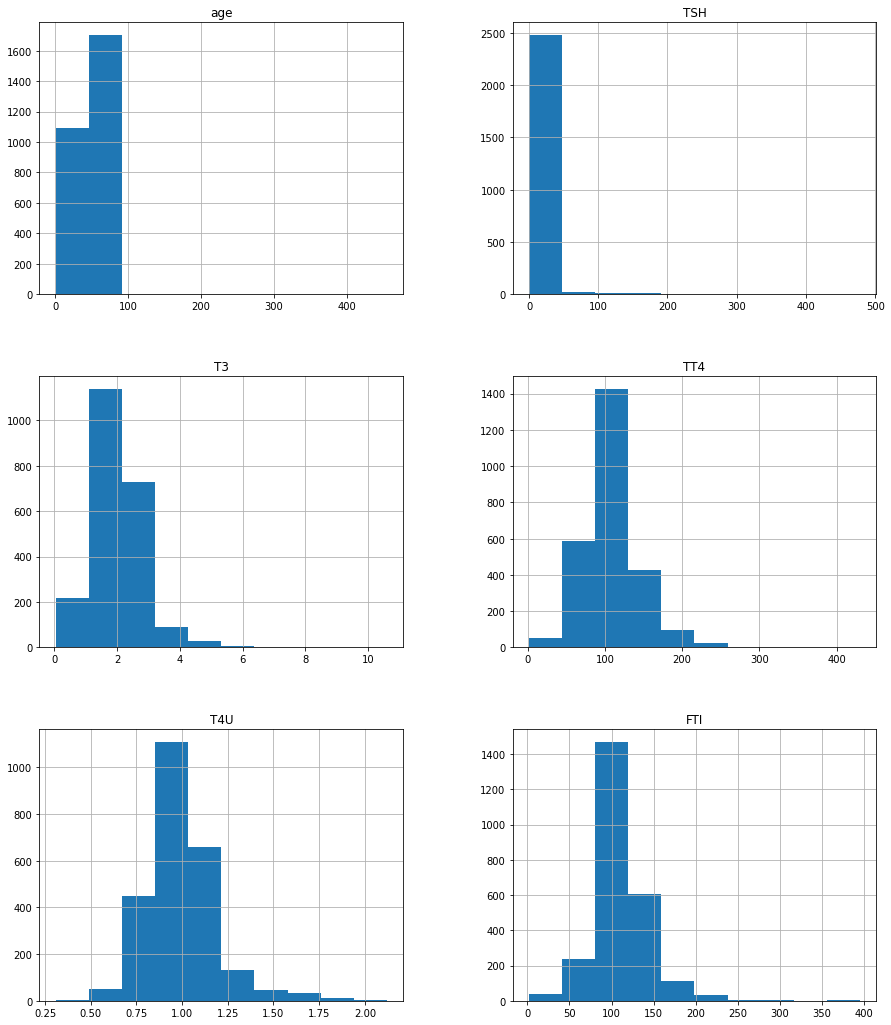

In [34]:
#will check the distribution of all the variables.

def show_hist(x):
    plt.rcParams['figure.figsize']=15,18
    x.hist()
    
show_hist(data_final)

#Most Features are not following the normal distribution, we need to standardise the data

## Bivariate Analysis

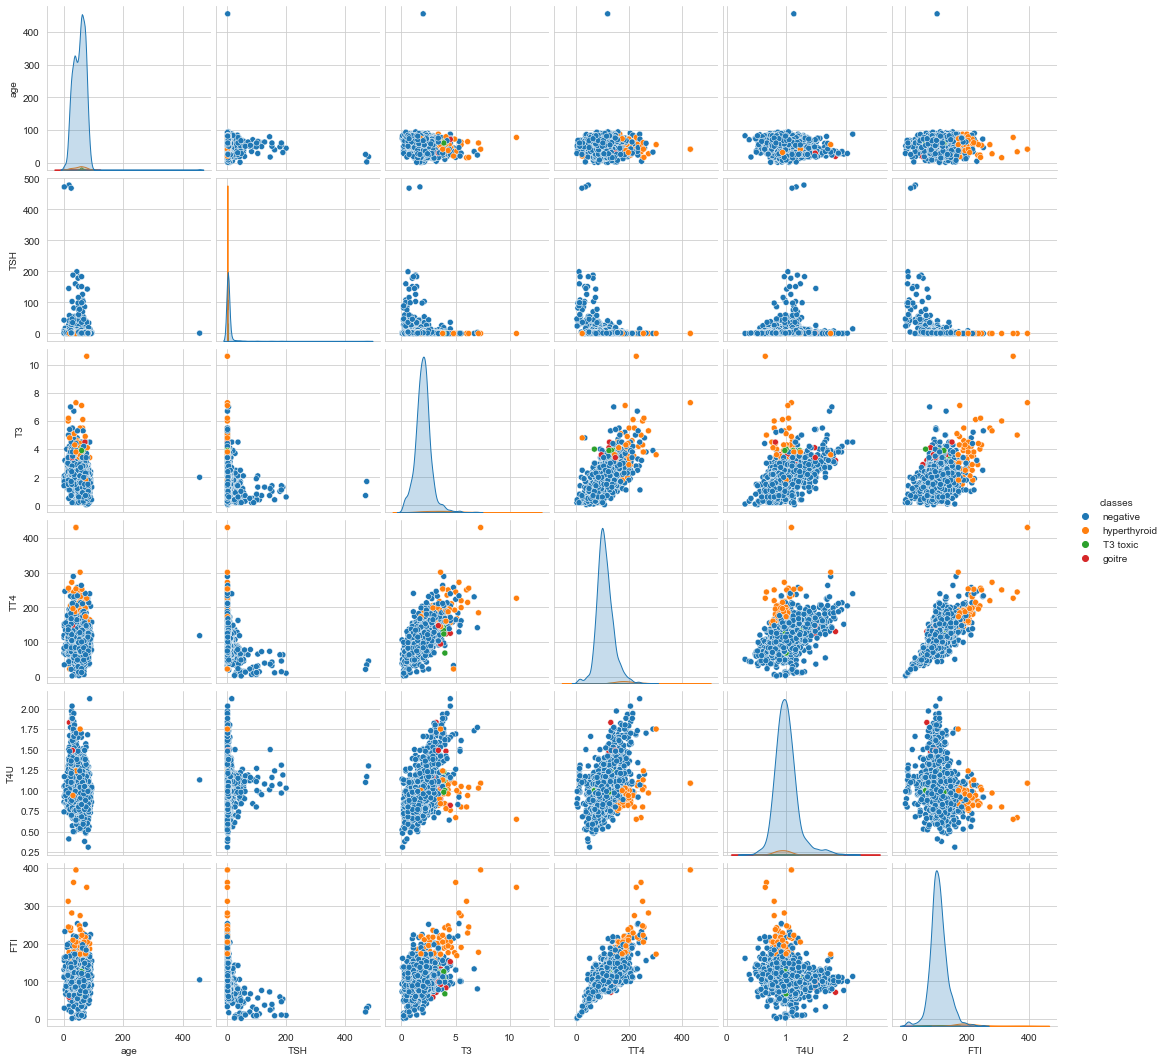

In [35]:
import seaborn as sns

sns.set_style("whitegrid")
sns.pairplot(data_final, hue ='classes')
plt.show() 

## Detecting Outliers

#### Boxplots

<AxesSubplot:xlabel='classes', ylabel='FTI'>

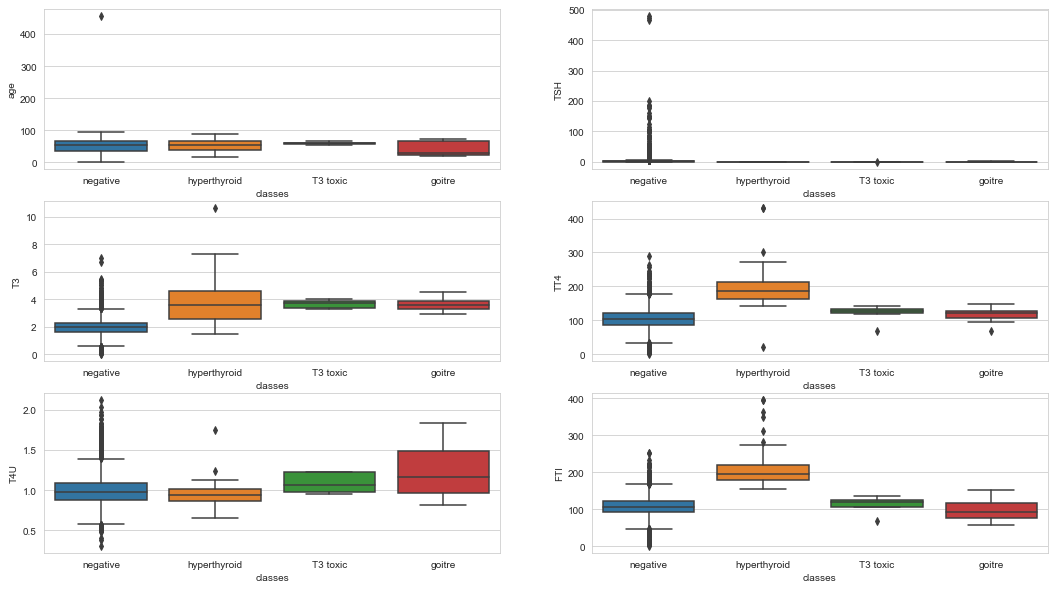

In [37]:
fig, axes = plt.subplots(3,2, figsize=(18, 10))
  

sns.boxplot(ax=axes[0, 0], data=data_final, x='classes', y='age')
sns.boxplot(ax=axes[0, 1], data=data_final, x='classes', y='TSH')
sns.boxplot(ax=axes[1, 0], data=data_final, x='classes', y='T3')
sns.boxplot(ax=axes[1, 1], data=data_final, x='classes', y='TT4')
sns.boxplot(ax=axes[2, 0], data=data_final, x='classes', y='T4U')
sns.boxplot(ax=axes[2, 1], data=data_final, x='classes', y='FTI')


#From the graph, we can easily identify that there are outliers in the data, which needs to be removed or handled

## Feature Engineering

## Handling missing values

In [38]:
from sklearn.impute import SimpleImputer

#Handle numerical features
simple_imputer=SimpleImputer(strategy='median')
numerical_missing=pd.DataFrame(simple_imputer.fit_transform(data_final.select_dtypes(exclude='O')))

#Handle categorical features
cat_imputation=SimpleImputer(strategy='most_frequent')
categorical_missing=pd.DataFrame(cat_imputation.fit_transform(data_final.select_dtypes(exclude='number')))

numerical_missing.columns=data_final.select_dtypes(exclude='O').columns
categorical_missing.columns=data_final.select_dtypes(exclude='number').columns

new_data=pd.concat([numerical_missing,categorical_missing],axis=1)

In [39]:
new_data.head()

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,tumor,hypopituitary,psych,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,f,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,f,t,t,f,f,f,other,negative
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,f,f,t,t,t,f,other,negative
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,f,t,t,f,f,f,other,negative
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,f,t,t,t,t,f,SVI,negative


In [40]:
new_data.isnull().sum().sum()

0

### Outliers detection and removal

Since all the numerical features not following Normal distribution, will use percentile method to detect the outliers and remove them

In [41]:
new_data.shape

(2800, 28)

In [42]:
new_data=new_data.drop(new_data.age.index[1364])

In [43]:
new_data.shape


(2799, 28)

In [44]:
def outliers_removal(numerical_missing):
    for column in numerical_missing:
        sort=np.sort(numerical_missing[column])
        lower_limit,upper_limit=np.percentile(sort,[0,95])
        detected_outliers=numerical_missing.iloc[np.where((numerical_missing[column]>upper_limit) | (numerical_missing[column]<lower_limit))]
        #outliers_free_data=numerical_missing.iloc[np.where((numerical_missing[column]<=upper_limit) | (numerical_missing[column]>=lower_limit))]
        #print(f"upper limit for {column}: {upper_limit} and lower limit for {column}: {lower_limit}")
        return detected_outliers


In [45]:
outliers_data=outliers_removal(new_data)
outliers_data

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,tumor,hypopituitary,psych,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
7,80.0,2.20,0.6,80.0,0.70,115.0,F,f,f,f,...,f,f,f,t,t,t,t,f,SVI,negative
10,84.0,1.10,2.2,115.0,0.95,121.0,F,f,f,f,...,t,f,f,t,t,t,t,f,SVI,negative
18,80.0,6.00,1.6,99.0,0.95,104.0,F,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
22,81.0,1.90,0.3,102.0,0.96,106.0,M,f,f,f,...,f,f,f,t,t,t,t,f,SVI,negative
34,85.0,7.30,2.4,66.0,1.09,61.0,F,f,f,f,...,f,f,f,t,t,t,t,f,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,84.0,3.60,0.6,82.0,0.74,110.0,M,f,f,f,...,f,f,t,t,t,t,t,f,SVI,negative
2774,82.0,2.20,1.0,68.0,0.77,88.0,M,f,f,f,...,f,f,f,t,t,t,t,f,SVI,negative
2783,82.0,0.50,2.0,125.0,0.84,149.0,F,f,f,f,...,f,f,f,f,t,t,t,f,other,negative
2793,82.0,0.03,1.4,74.0,0.52,143.0,F,f,f,f,...,f,f,f,t,t,t,t,f,other,negative


In [46]:
new_data.shape

(2799, 28)

In [47]:
new_df=new_data.drop(outliers_data.index)
new_df

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,tumor,hypopituitary,psych,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source,classes
0,41.0,1.30,2.5,125.0,1.14,109.0,F,f,f,f,...,f,f,f,t,t,t,t,f,SVHC,negative
1,23.0,4.10,2.0,102.0,0.98,107.0,F,f,f,f,...,f,f,f,t,t,f,f,f,other,negative
2,46.0,0.98,2.0,109.0,0.91,120.0,M,f,f,f,...,f,f,f,f,t,t,t,f,other,negative
3,70.0,0.16,1.9,175.0,0.98,107.0,F,t,f,f,...,f,f,f,t,t,f,f,f,other,negative
4,70.0,0.72,1.2,61.0,0.87,70.0,F,f,f,f,...,f,f,f,t,t,t,t,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,25.0,1.90,1.7,167.0,1.21,137.0,F,f,f,f,...,f,f,f,t,t,t,t,f,other,negative
2795,70.0,2.70,2.0,155.0,1.05,148.0,M,f,f,f,...,f,f,f,f,t,t,t,f,SVI,negative
2796,73.0,1.40,0.7,63.0,0.88,72.0,M,f,t,f,...,f,f,f,t,t,t,t,f,other,negative
2797,75.0,1.40,2.0,147.0,0.80,183.0,M,f,f,f,...,f,f,f,f,t,t,t,f,other,negative


In [48]:
new_df.shape

(2666, 28)

In [49]:
new_df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [50]:
new_df.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex', 'on_thyroxine',
       'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured',
       'TBG_measured', 'referral_source', 'classes'],
      dtype='object')

In [51]:
new_df.to_csv('Preprocessed_thyroid_data.csv',index=False)

In [52]:
new_df.shape

(2666, 28)

In [53]:
X = new_df.iloc[: , 0:-1]
Y = new_df.iloc[: , -1] 

# Splitting the dataset into the Training set and Test set

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2132, 27), (534, 27), (2132,), (534,))

# Encoding categorical data




### Encoding the Independent Variable

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_train.select_dtypes(exclude='number')))
X_train_cat_encoded.columns = X_train.select_dtypes(exclude='number').columns

In [57]:
X_test_cat_encoded = pd.DataFrame(ordinal_encoder.transform(X_test.select_dtypes(exclude='number')))
X_test_cat_encoded.columns = X_test.select_dtypes(exclude='number').columns

### Encoding the Dependent Variable

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
label_encoder = LabelEncoder()
Y_train_cat_encoded= pd.DataFrame(label_encoder.fit_transform(Y_train))
print(Y_train_cat_encoded.value_counts())
print(Y_train.value_counts())

3    2067
2      52
1       7
0       6
dtype: int64
negative        2067
hyperthyroid      52
goitre             7
T3 toxic           6
Name: classes, dtype: int64


In [60]:
Y_test_cat_encoded = pd.DataFrame(label_encoder.transform(Y_test))

In [61]:
X_test.shape

(534, 27)

## Standardization

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc=pd.DataFrame(sc.fit_transform(X_train.select_dtypes(exclude='O')))
X_test_sc=pd.DataFrame(sc.transform(X_test.select_dtypes(exclude='O')))

X_train_sc.columns=X_train.select_dtypes(exclude='O').columns
X_test_sc.columns=X_test.select_dtypes(exclude='O').columns


In [63]:
X_train_final=pd.concat([X_train_sc,X_train_cat_encoded],axis=1)

X_test_final=pd.concat([X_test_sc,X_test_cat_encoded],axis=1)

In [64]:
X_train_final

,age,TSH,T3,TT4,T4U,FTI,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,...,goitre,tumor,hypopituitary,psych,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,referral_source
0,1.221624,0.069667,-0.861402,-0.066156,0.396527,-0.329429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0
1,-1.055282,-0.126710,0.331007,-0.584741,1.239451,-1.207478,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
2,0.333076,-0.170661,-0.463932,0.135517,-0.614981,0.548620,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0
3,-0.166733,-0.194507,2.980805,2.296290,0.396527,2.053848,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
4,0.499678,-0.131385,-0.331442,1.086257,0.621307,0.674056,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,0.277541,-0.201286,-0.596422,0.164327,-0.895956,0.862209,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
2128,0.832884,-0.200117,-0.198952,1.201498,-0.614981,1.834335,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
2129,-0.555473,-0.150088,0.993457,-0.066156,0.508917,-0.360788,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
2130,-1.221885,-0.089305,0.066027,0.452430,-0.109227,-0.109916,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0


## Handling imbalanced Dataset

#Since the dataset is small, will use over-sampling: SMOTE technique to balance the data

SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbours for this point. The synthetic points are added between the chosen point and its neighbours.

In [65]:
from imblearn.over_sampling import SMOTE

X_train_resample,Y_train_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_train_final,Y_train_cat_encoded)
X_test_resample,Y_test_resample=SMOTE(random_state=0,k_neighbors=1).fit_resample(X_test_final,Y_test_cat_encoded)

X_train_resample.shape,X_test_resample.shape,Y_train_resample.shape,Y_test_resample.shape

((8268, 27), (1572, 27), (8268, 1), (1572, 1))

## Feature Selection

In [66]:
pip install joblib

You should consider upgrading via the 'c:\Users\sakshi singh\Desktop\Project Thy\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [67]:
import joblib

In [68]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [69]:

#from sklearn.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [70]:
print('Training dataset shape:', X_train_resample.shape, Y_train_resample.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample.shape)

Y_train_resample_flat = Y_train_resample.to_numpy().ravel()
Y_test_resample_flat = Y_test_resample.to_numpy().ravel()

print('Training dataset shape:', X_train_resample.shape, Y_train_resample_flat.shape)
print('Testing dataset shape:', X_test_resample.shape, Y_test_resample_flat.shape)


Training dataset shape: (8268, 27) (8268, 1)
Testing dataset shape: (1572, 27) (1572, 1)
Training dataset shape: (8268, 27) (8268,)
Testing dataset shape: (1572, 27) (1572,)


In [71]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)

forward_fs = sfs(rf , k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

forward_fs = forward_fs.fit(X_train_resample, Y_train_resample_flat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.2min finished

[2022-02-27 18:09:59] Features: 1/10 -- score: 0.7818106538915358[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:  2.8min finished

[2022-02-27 18:12:45] Features: 2/10 -- score: 0.9430342837872733[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.4min finished

[2022-02-27 18:15:08] Features: 3/10 -- score: 0.9885103556539683[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [72]:
feat_names = list(forward_fs.k_feature_names_)
print(feat_names)

['age', 'TSH', 'T3', 'TT4', 'FTI', 'on_thyroxine', 'on_antithyroid_medication', 'pregnant', 'tumor', 'hypopituitary']


In [73]:
X_train_new=X_train_resample[['age', 'TSH', 'T3', 'TT4', 'FTI', 'on_thyroxine', 'pregnant', 'tumor', 'T4U_measured','FTI_measured']]
X_test_new=X_test_resample[['age', 'TSH', 'T3', 'TT4', 'FTI', 'on_thyroxine', 'pregnant', 'tumor',  'T4U_measured','FTI_measured']]


In [74]:
rf_model=rf.fit(X_train_new,Y_train_resample_flat)

In [75]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [76]:

def print_Score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("-----------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n===============")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("---------------------------------")
        print(f"Classification Report:\n{clf_report}")
        print("---------------------------------")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

In [77]:
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)

Train Result:
Accuracy Score:99.77%
---------------------------------
Classification Report:
                     0       1            2            3  accuracy  \
precision     0.997587     1.0     0.993272     1.000000  0.997702   
recall        1.000000     1.0     1.000000     0.990808  0.997702   
f1-score      0.998792     1.0     0.996625     0.995383  0.997702   
support    2067.000000  2067.0  2067.000000  2067.000000  0.997702   

             macro avg  weighted avg  
precision     0.997715      0.997715  
recall        0.997702      0.997702  
f1-score      0.997700      0.997700  
support    8268.000000   8268.000000  
-----------------------------------
Confusion Matrix:
[[2067    0    0    0]
 [   0 2067    0    0]
 [   0    0 2067    0]
 [   5    0   14 2048]]



In [78]:
print_Score(rf_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Test Result:
Accuracy Score:93.38%
---------------------------------
Classification Report:
                    0    1           2           3  accuracy    macro avg  \
precision    0.997647  0.0    0.996198    0.838710  0.933842     0.708139   
recall       0.809160  0.0    1.000000    0.992366  0.933842     0.700382   
f1-score     0.893572  0.0    0.998095    0.909091  0.933842     0.700190   
support    524.000000  0.0  524.000000  524.000000  0.933842  1572.000000   

           weighted avg  
precision      0.944185  
recall         0.933842  
f1-score       0.933586  
support     1572.000000  
---------------------------------
Confusion Matrix:
[[424   0   0 100]
 [  0   0   0   0]
 [  0   0 524   0]
 [  1   1   2 520]]



c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,max_iter=10)

lr_model=lr.fit(X_train_new,Y_train_resample_flat)

lr_train_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)


Train Result:
Accuracy Score:97.94%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.959165     0.986635     0.974088     1.000000  0.979439   
recall        1.000000     1.000000     0.982100     0.935656  0.979439   
f1-score      0.979157     0.993272     0.978078     0.966758  0.979439   
support    2067.000000  2067.000000  2067.000000  2067.000000  0.979439   

             macro avg  weighted avg  
precision     0.979972      0.979972  
recall        0.979439      0.979439  
f1-score      0.979316      0.979316  
support    8268.000000   8268.000000  
-----------------------------------
Confusion Matrix:
[[2067    0    0    0]
 [   0 2067    0    0]
 [  20   17 2030    0]
 [  68   11   54 1934]]



c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
lr_test_score=print_Score(lr_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Test Result:
Accuracy Score:97.26%
---------------------------------
Classification Report:
                    0    1           2           3  accuracy    macro avg  \
precision    0.973978  0.0    0.977055    0.974359  0.972646     0.731348   
recall       1.000000  0.0    0.975191    0.942748  0.972646     0.729485   
f1-score     0.986817  0.0    0.976122    0.958293  0.972646     0.730308   
support    524.000000  0.0  524.000000  524.000000  0.972646  1572.000000   

           weighted avg  
precision      0.975131  
recall         0.972646  
f1-score       0.973744  
support     1572.000000  
---------------------------------
Confusion Matrix:
[[524   0   0   0]
 [  0   0   0   0]
 [  0   0 511  13]
 [ 14   4  12 494]]



c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
## Navie Bayes Classification

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb_model=gnb.fit(X_train_new,Y_train_resample_flat)

gnb_train_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)


Train Result:
Accuracy Score:86.43%
---------------------------------
Classification Report:
                     0            1            2            3  accuracy  \
precision     0.877707     0.986635     0.718106     0.975262  0.864296   
recall        1.000000     1.000000     0.961297     0.495888  0.864296   
f1-score      0.934871     0.993272     0.822094     0.657473  0.864296   
support    2067.000000  2067.000000  2067.000000  2067.000000  0.864296   

             macro avg  weighted avg  
precision     0.889427      0.889427  
recall        0.864296      0.864296  
f1-score      0.851927      0.851927  
support    8268.000000   8268.000000  
-----------------------------------
Confusion Matrix:
[[2067    0    0    0]
 [   0 2067    0    0]
 [  50    4 1987   26]
 [ 238   24  780 1025]]



In [82]:
gnb_test_score=print_Score(gnb_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Test Result:
Accuracy Score:73.47%
---------------------------------
Classification Report:
                    0    1           2           3  accuracy    macro avg  \
precision    0.890777  0.0    0.592760    1.000000  0.734733     0.620884   
recall       0.700382  0.0    1.000000    0.503817  0.734733     0.551050   
f1-score     0.784188  0.0    0.744318    0.670051  0.734733     0.549639   
support    524.000000  0.0  524.000000  524.000000  0.734733  1572.000000   

           weighted avg  
precision      0.827846  
recall         0.734733  
f1-score       0.732852  
support     1572.000000  
---------------------------------
Confusion Matrix:
[[367   0 157   0]
 [  0   0   0   0]
 [  0   0 524   0]
 [ 45  12 203 264]]



c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=5)
dt_model=dtc.fit(X_train_new,Y_train_resample_flat)

dt_train_score=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)

Train Result:
Accuracy Score:99.93%
---------------------------------
Classification Report:
                0       1            2            3  accuracy    macro avg  \
precision     1.0     1.0     0.997106     1.000000  0.999274     0.999276   
recall        1.0     1.0     1.000000     0.997097  0.999274     0.999274   
f1-score      1.0     1.0     0.998551     0.998547  0.999274     0.999274   
support    2067.0  2067.0  2067.000000  2067.000000  0.999274  8268.000000   

           weighted avg  
precision      0.999276  
recall         0.999274  
f1-score       0.999274  
support     8268.000000  
-----------------------------------
Confusion Matrix:
[[2067    0    0    0]
 [   0 2067    0    0]
 [   0    0 2067    0]
 [   0    0    6 2061]]



In [84]:
dt_test_model=print_Score(dt_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Test Result:
Accuracy Score:75.64%
---------------------------------
Classification Report:
                    0    1           2           3  accuracy    macro avg  \
precision    0.994819  0.0    0.941061    0.596774  0.756361     0.633163   
recall       0.366412  0.0    0.914122    0.988550  0.756361     0.567271   
f1-score     0.535565  0.0    0.927396    0.744253  0.756361     0.551803   
support    524.000000  0.0  524.000000  524.000000  0.756361  1572.000000   

           weighted avg  
precision      0.844218  
recall         0.756361  
f1-score       0.735738  
support     1572.000000  
---------------------------------
Confusion Matrix:
[[192   0  27 305]
 [  0   0   0   0]
 [  0   0 479  45]
 [  1   2   3 518]]



c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
## KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn_model=knn.fit(X_train_new,Y_train_resample_flat)

knn_train_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=True)

Train Result:
Accuracy Score:99.55%
---------------------------------
Classification Report:
                     0       1            2            3  accuracy  \
precision     0.996145     1.0     0.986164     1.000000  0.995525   
recall        1.000000     1.0     1.000000     0.982100  0.995525   
f1-score      0.998069     1.0     0.993034     0.990969  0.995525   
support    2067.000000  2067.0  2067.000000  2067.000000  0.995525   

             macro avg  weighted avg  
precision     0.995577      0.995577  
recall        0.995525      0.995525  
f1-score      0.995518      0.995518  
support    8268.000000   8268.000000  
-----------------------------------
Confusion Matrix:
[[2067    0    0    0]
 [   0 2067    0    0]
 [   0    0 2067    0]
 [   8    0   29 2030]]



In [86]:
knn_test_score=print_Score(knn_model,X_train_new,X_test_new,Y_train_resample_flat,Y_test_resample_flat,train=False)

Test Result:
Accuracy Score:84.03%
---------------------------------
Classification Report:
                    0    1           2           3  accuracy    macro avg  \
precision    0.996441  0.0    0.988679    0.998069  0.840331     0.745798   
recall       0.534351  0.0    1.000000    0.986641  0.840331     0.630248   
f1-score     0.695652  0.0    0.994307    0.992322  0.840331     0.670571   
support    524.000000  0.0  524.000000  524.000000  0.840331  1572.000000   

           weighted avg  
precision      0.994397  
recall         0.840331  
f1-score       0.894094  
support     1572.000000  
---------------------------------
Confusion Matrix:
[[280 243   0   1]
 [  0   0   0   0]
 [  0   0 524   0]
 [  1   0   6 517]]



c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sakshi singh\Desktop\Project Thy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pickling the Model

In [87]:
import pickle


In [88]:
filename = 'model.sav'


In [90]:
pickle.dump(lr_model, open(filename, 'wb'))


In [91]:
load_model = pickle.load(open(filename, 'rb'))


In [92]:
model_score_r1 = load_model.score(X_test_new, Y_test_resample_flat)


In [93]:
model_score_r1


0.97264631043257